In [1]:
%matplotlib notebook
import numpy as np;
import matplotlib;
matplotlib.interactive(True); # extremely useful for interactive development in in ipython, draws immediately without waiting for plt.show
import matplotlib.pyplot as plt;
from matplotlib.widgets import Slider, Button, RadioButtons;

/home/bngo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in cdouble_scalars
/home/bngo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in cdouble_scalars
/home/bngo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply


<IPython.core.display.Javascript object>


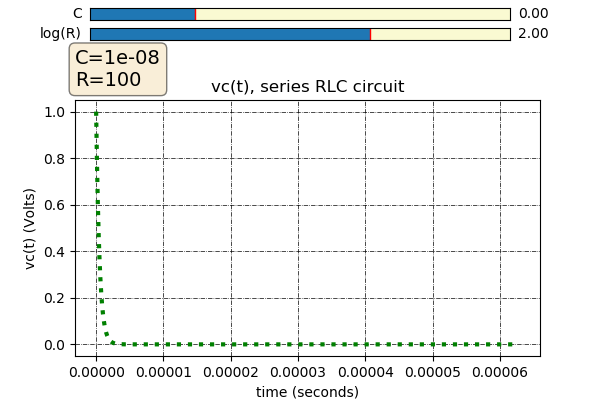

/home/bngo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


<IPython.core.display.Javascript object>


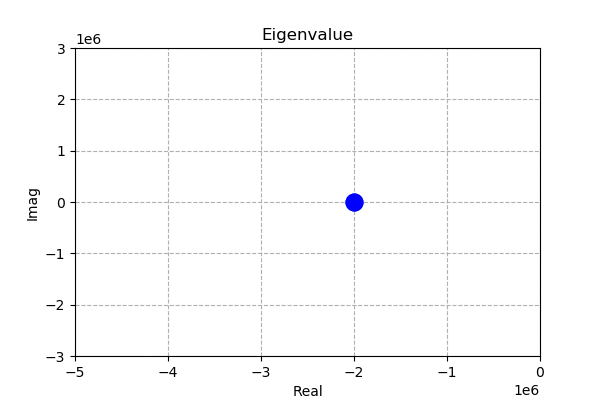

In [7]:
"""
==============================================================
Time domain solutions for HW3 (vsrc series RLC circuit) - Spring 2020
==============================================================

This plots the time domain solution vc(t) and the eigenvalues of the state space matrix 
for the series RLC circuit in the question, for t>0.
You can change parameters using sliders and see the effect on the waveform.


"""
## CHANGELOG ##
# 2019/02/13: initial version (code based on slider_demo.py in the matplotlib documentation). JR <jr@berkeley.edu>
# 2019/02/20: add eigenvalue plot RL


j=1j; # sqrt(-1);

class structtype: # MATLAB-like struct, useful for organization
    pass;
# end class structtype

parms = structtype();
parms.R = 2 * np.sqrt(25e-6 / 10e-9);
parms.C = 10e-9; # 10nF
parms.L = 25e-6; # 25uH
parms.f0 = 1/np.sqrt(parms.L*parms.C)/2/np.pi;
parms.tauC = parms.R*parms.C;
parms.tauL = parms.L/parms.R;
parms.alpha = parms.R/(2*parms.L);

# you can examine these very easily with vars(parms)
# dir(parms) is also useful

# you can examine these very easily with vars(parms)
# dir(parms) is also useful

def vc_of_t(t, initcond): # solution for vc of t given an initial condition
    """
        vc(t) = K1 e^{lambda_1 t} + K2 e^{lambda_1 t}, where:
            lambda1/2 = -alpha +- sqrt(alpha^2 - 4 pi^2 f0^2)
            K1 = vc(0)/(1-lambda1/lambda2)
            K2 = vc(0) - K1
    """
    sqrtterm = np.sqrt(parms.alpha**2 - 4 * np.pi**2 * parms.f0**2 + 0j);
    lambda1 = -parms.alpha + sqrtterm;
    lambda2 = -parms.alpha - sqrtterm;
    K1 = initcond/(1-lambda1/lambda2);
    K2 = initcond - K1;
    retval = np.real(K1*np.exp(lambda1*t) + K2*np.exp(lambda2*t));
    return(retval);

def vcenvelope_of_t(t, initcond): # approximate envelope for vc of t given an initial condition
    """
        vc(t) = K1 e^{lambda_1 t} + K2 e^{lambda_1 t}, where:
            lambda1/2 = -alpha +- sqrt(alpha^2 - 4 pi^2 f0^2)
            K1 = vc(0)/(1-lambda1/lambda2)
            K2 = vc(0) - K1
    """
    if (4 * np.pi**2 * parms.f0**2 < parms.alpha**2):
        sqrtterm = np.sqrt(parms.alpha**2 - 4 * np.pi**2 * parms.f0**2 + 0j)
        lambda1 = -parms.alpha + sqrtterm;
        lambda2 = -parms.alpha - sqrtterm;
        K1 = initcond/(1-lambda1/lambda2);
        K2 = initcond - K1;
        retval = np.real(0 + K1*np.exp(lambda1*t) + K2*np.exp(lambda2*t));
    else:
        sqrtterm = 0
        lambda1 = -parms.alpha;
        K1 = initcond;
        retval = np.real(K1*np.exp(lambda1*t)); # - lambda1*t*np.exp(lambda1*t)); 
    return(retval);
# end def HR

n_cycles = 20;
pts_per_cycle = 50;
N = pts_per_cycle*n_cycles;
ts = 1/parms.f0*n_cycles*np.array(range(0,N+1))/N;

vcs = vc_of_t(ts, initcond=1); #
vcenvelope = vcenvelope_of_t(ts, initcond=1);

fig, ax = plt.subplots(); # like MATLAB's figure()
plt.subplots_adjust(top=0.75); # changes the margins of the plot

l, = plt.plot(ts, vcs, lw=1, color='red', linestyle='-'); # l, makes it a tuple? l of type matplotlib.lines.line2D. this is like the basic matlab plot(...)
lenv, = plt.plot(ts, vcenvelope, lw=1, color='green', linewidth=3, linestyle=':'); # l, makes it a tuple? l of type matplotlib.lines.line2D. this is like the basic matlab plot(...)
#plt.axis([0, 1, -10, 10]); # sets the axis
plt.grid(color='k', linestyle='-.', linewidth=0.5); # shows the grid
plt.grid(which='minor', color='k', linestyle=':', linewidth=0.25); # shows the grid
#plt.sca(ax); # set current axes - useful if you have several axes in the figure, as we do
plt.xlabel('time (seconds)'); # 
plt.ylabel('vc(t) (Volts)');
plt.title('vc(t), series RLC circuit');
fig.set_size_inches(6, 4)

axcolor = 'lightgoldenrodyellow';
axC = plt.axes([0.15, 0.95, 0.7, 0.03], facecolor=axcolor); # this brings up another set of axes in the same figure, below the previous one. The argumens are    presumably xstart, ystart, width, height
#plt.axis('off');
axR = plt.axes([0.15, 0.9, 0.7, 0.03], facecolor=axcolor); # 

Cmin = parms.C/3;
Cmax = 3*parms.C;
N_C = 100;
sC = Slider(axC, 'C', Cmin, Cmax, valinit=parms.C); # this turns sC into a slider. The args are the range. The 'C' is a label
#, valstep=(Cmax-Cmin)/N_C
Rmin = 1e-2;
Rmax = 1e4;
N_R = 100;
sR = Slider(axR, 'log(R)', np.log10(Rmin), np.log10(Rmax), valinit=np.log10(parms.R)); # , valstep=(np.log10(Rmax)-np.log10(Rmin))/N_R

textstr = '\n'.join((
    r'C=%g' % (parms.C, ),
    r'R=%g' % (parms.R, ) ));

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5);
textH = plt.text(0.0, 1.2, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props);

fig, e_val_ax = plt.subplots()
radical = 0.5*np.sqrt((parms.R/parms.L)**2-4/(parms.L*parms.C)+0j)
e_val_1 = -0.5*parms.R/parms.L+radical
e_val_2 = -0.5*parms.R/parms.L-radical
e_val_lines, = e_val_ax.plot([np.real(e_val_1),np.real(e_val_2)],[np.imag(e_val_1),np.imag(e_val_2)],'bo',markersize=12)
e_val_ax.set_xlim(-5e6,100)
e_val_ax.set_ylim(-3e6,3e6)
e_val_ax.set_xlabel("Real")
e_val_ax.set_ylabel("Imag")
e_val_ax.set_title("Eigenvalue")
e_val_ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
e_val_ax.grid(True,which='major',linestyle='--')
fig.set_size_inches(6, 4)

def update(val): # function to update the sliding f marker
    C = sC.val;
    logR = sR.val;
    #print(C)
    #print(logR)
    R = 10**logR;
    parms.R = R;
    parms.C = C;
    parms.tauC = parms.R*parms.C;
    parms.tauL = parms.L/parms.R;
    parms.alpha = parms.R/(2*parms.L);
    parms.f0 = 1/(2*np.pi*np.sqrt(parms.L*parms.C));

    #ylim = ax.get_ylim();
    #ymin = ylim[0];
    #ymax = ylim[1];

    vcs = vc_of_t(ts, 1);
    vcenvelope = vcenvelope_of_t(ts,1);
    
    radical = 0.5*np.sqrt((R/parms.L)**2-4/(parms.L*C)+0j)
    e_val_1 = -0.5*R/parms.L+radical
    e_val_2 = -0.5*R/parms.L-radical
    
#     print(vcs)
    l.set_ydata(vcs);
    lenv.set_ydata(vcenvelope)
    e_val_lines.set_xdata([np.real(e_val_1),np.real(e_val_2)])
    e_val_lines.set_ydata([np.imag(e_val_1),np.imag(e_val_2)])
#     e_val_ax.relim(True); # recalculate axis bounds
#     e_val_ax.autoscale_view(); # apply
#     ax.relim(True); # recalculate axis bounds
#     ax.autoscale_view(); # apply


    textstr = '\n'.join((
        r'C=%g' % (parms.C, ),
        r'R=%g' % (parms.R, ),))
#         r'R(eval1)=%g' % (np.real(e_val_1),),
#         r'I(eval1)=%g' % (np.imag(e_val_1)),));
    textH.set_text(textstr);
    

#     display(e_val_1)
#     e_val_ax.plot(np.real(e_val_1),np.imag(e_val_1),'bo',markersize=12)




    #fig.canvas.draw_idle(); # "draw only if idle; backends can override" ??? seems to make no difference in ipython interactive, at least
# end def update

sC.on_changed(update); # attaching the update function to changes in sfreq slider
sR.on_changed(update); # attaching the update function to changes in sR slider

# and now the sliders change the figure